# Model Explorations

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from ema_workbench import ema_logging, MultiprocessingEvaluator
from ema_workbench import Model, RealParameter, ScalarOutcome, CategoricalParameter, IntegerParameter, BooleanParameter
from ema_workbench.em_framework.samplers import sample_uncertainties
# from ema_workbench.em_framework.evaluators import MC
from dike_model_function import DikeNetwork
from problem_formulation import get_model_for_problem_formulation
ema_logging.log_to_stderr(ema_logging.INFO)

In [4]:
from ema_workbench.util.utilities import load_results

results = load_results('./martijnmc10pol1000scen.tar.gz')

[MainProcess/INFO] results loaded succesfully from /home/jovyan/work/final assignment/martijnmc10pol1000scen.tar.gz


##### @ Martajin, for unknown reasons, I'm not able to run the cell above(maybe it just runs super slow). I thus created another notebook and I used the way in the example ("ProblemFormulation.ipynb) to import model and perform experiments. It runs faster than this one! 

@Hongxuan, i f*'ed up. Sorry. Forgot to push my working results. But as you can see the problem was in the outcome. No real outcomes used in the model were defined. It was just a test run, with 10 scenarios to test if this works. This should also work for you. ALthough it still is slow. 

In [17]:
sns.set(style="ticks", color_codes=True)
experiments, outcomes = results

data = pd.DataFrame.from_dict(outcomes)
data = data.drop(data.tail(90000).index)
sns.pairplot(data, vars=list(outcomes.keys()), diag_kind='hist')
plt.show()

In [19]:
data = pd.DataFrame.from_dict(outcomes)
print(data.head())

   A.1_Expected Annual Damage 0  A.1_Dike Investment Costs 0  \
0                           0.0                 7.629909e+07   
1                           0.0                 7.629909e+07   
2                           0.0                 7.629909e+07   
3                           0.0                 7.629909e+07   
4                           0.0                 7.629909e+07   

   A.1_Expected Number of Deaths 0  A.2_Expected Annual Damage 0  \
0                              0.0                  9.728715e+06   
1                              0.0                  0.000000e+00   
2                              0.0                  0.000000e+00   
3                              0.0                  0.000000e+00   
4                              0.0                  0.000000e+00   

   A.2_Dike Investment Costs 0  A.2_Expected Number of Deaths 0  \
0                 6.604510e+07                         0.001012   
1                 6.604510e+07                         0.000000   
2    

In [28]:
data = pd.DataFrame.from_dict(outcomes)

dam_list = data.filter(like='Damage').columns
# print(data.filter(like='Damage').columns)
data['total-dam'] = data[dam_list].sum(axis=1)
data.drop(columns=dam_list, inplace=True)
death_list = data.filter(like='Deaths').columns
data['total-death'] = data[death_list].sum(axis=1)
data.drop(columns=death_list, inplace=True)
invest_list = data.filter(like='Investment').columns
data['total-invest'] = data[invest_list].sum(axis=1)
data.drop(columns=invest_list, inplace=True)
rfr_list = data.filter(like='RfR').columns
data['total-RfR'] = data[rfr_list].sum(axis=1)
data.drop(columns=rfr_list, inplace=True)
evac_list = data.filter(like='Evacuation').columns
data['total-evac'] = data[evac_list].sum(axis=1)
data.drop(columns=evac_list, inplace=True)
print(data.head())

      total-dam  total-death  total-invest     total-RfR    total-evac
0  2.957515e+08     0.029145  8.040935e+08  1.683000e+09  11814.782064
1  4.998820e+06     0.001042  8.040935e+08  1.683000e+09    371.547903
2  7.334526e+07     0.009738  8.040935e+08  1.683000e+09   3636.539018
3  3.876869e+08     0.038113  8.040935e+08  1.683000e+09  15623.791806
4  2.176716e+07     0.003708  8.040935e+08  1.683000e+09   1330.120110


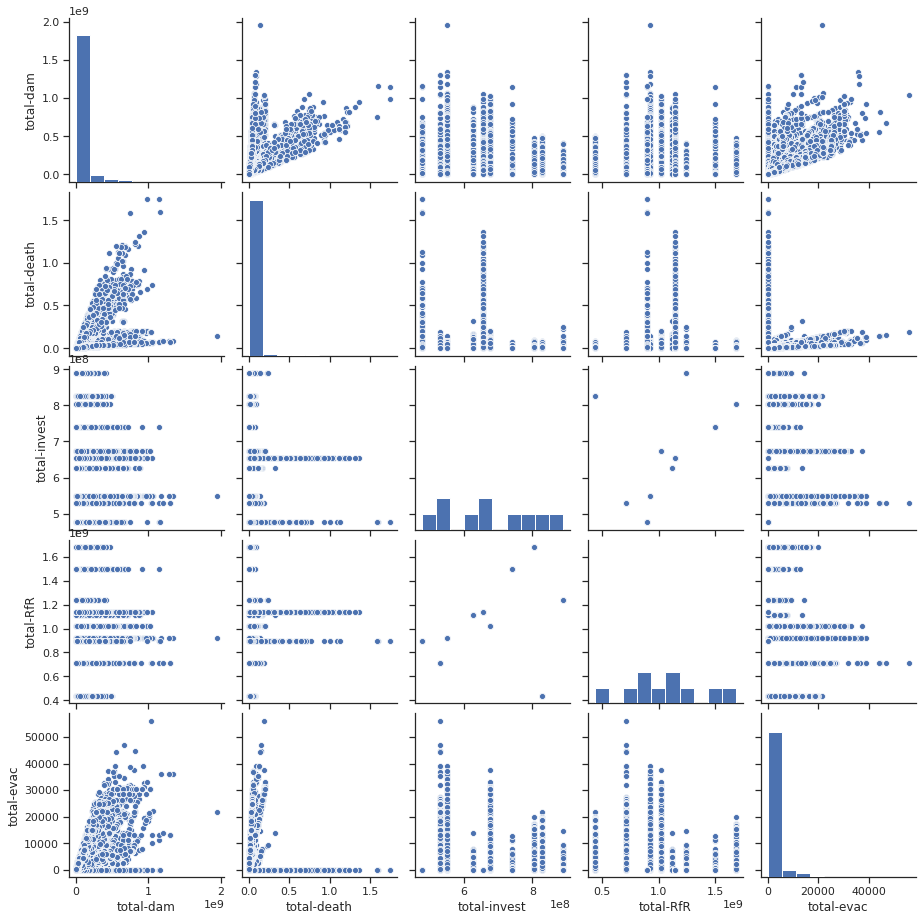

In [29]:
sns.pairplot(data, vars=list(data.columns), diag_kind='hist')
plt.show()

<ipython-input-32-23bd7a8ec52d>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax4 = plt.subplot(223)


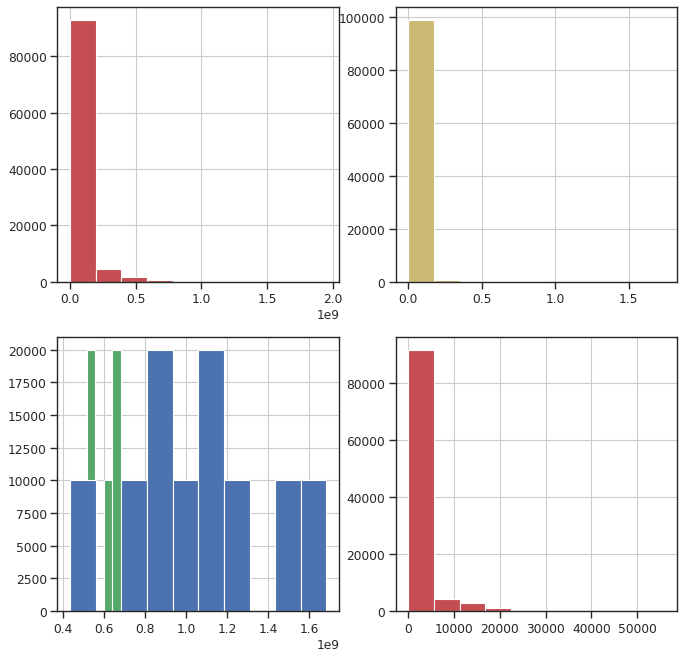

In [32]:
import matplotlib.pyplot as plt # TO DO; plot the scalers.

plt.figure(figsize=(10,10), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
data['total-dam'].hist(color="r")
ax2 = plt.subplot(222)
data['total-death'].hist(color="y")
ax3 = plt.subplot(223)
data['total-invest'].hist(color="g")
ax4 = plt.subplot(223)
data['total-RfR'].hist(color="b")
ax5 = plt.subplot(224)
data['total-evac'].hist(color="r")

In [ ]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

SMALLER = 'SMALLER'

Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.000001) #not ok
Expected_Annual_Damage = functools.partial(robustness, SMALLER, 1000) #THOSE NUMBERS NEED TO BE SPECIFIED AGAINS
Total_Investment_Costs = functools.partial(robustness, SMALLER, 150000000)#THOSE NUMBERS NEED TO BE SPECIFIED AGAINS

from problem_formulation import get_model_for_problem_formulation
from ema_workbench.em_framework.evaluators import MC

model = get_model_for_problem_formulation(0)
from ema_workbench import ema_logging, MultiprocessingEvaluator

ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(scenarios=200,               #500
                                            policies=4,
                                            uncertainty_sampling=MC)